In [1]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import time
import numpy as np

In [16]:
%matplotlib inline
#%matplotlib notebook
plt.style.use('bmh')
#plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15.0, 6)
plt.rcParams['font.size'] = 14

In [3]:
data = np.loadtxt('../19_06_whole_control/Temp_log_20191113_14_29.txt', dtype=object)

In [4]:
tstamp = data[0,0] + " " + data[0,1]
tstamp

'13-Nov-2019 14:30:41:'

In [5]:
t = dt.datetime.strptime(tstamp, "%d-%b-%Y %H:%M:%S:")
print(t)

2019-11-13 14:30:41


In [6]:
liste = []
for date in data:
    tstamp = date[0] + " " + date[1]
    t = dt.datetime.strptime(tstamp, "%d-%b-%Y %H:%M:%S:")
    liste.append([t, float(date[3]), float(date[6])])

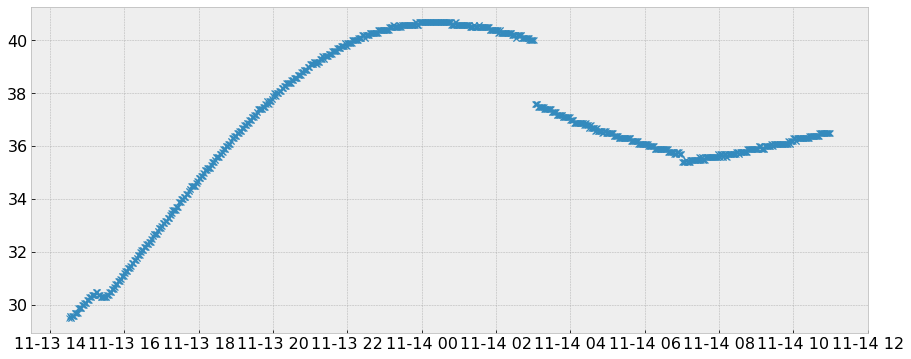

In [7]:
lista = np.array(liste)
plt.plot(lista[:,0],lista[:,2],"x")
#plt.yticks(np.arange(int(min(lista[:,2])), max(lista[:,2])+1, 5))


(array([25., 25., 24., 25., 24., 25., 24., 25., 25., 24., 25., 24., 25.,
        24., 25., 24., 25., 25., 24., 25., 24., 25., 24., 25., 25., 24.,
        25., 24., 25., 24., 24., 24., 25., 25., 24., 25., 24., 25., 24.,
        25., 23., 25., 25., 24., 25., 24., 25., 24., 25., 25.]),
 array([737376.6046412 , 737376.62169792, 737376.63875463, 737376.65581134,
        737376.67286806, 737376.68992477, 737376.70698148, 737376.72403819,
        737376.74109491, 737376.75815162, 737376.77520833, 737376.79226505,
        737376.80932176, 737376.82637847, 737376.84343519, 737376.8604919 ,
        737376.87754861, 737376.89460532, 737376.91166204, 737376.92871875,
        737376.94577546, 737376.96283218, 737376.97988889, 737376.9969456 ,
        737377.01400231, 737377.03105903, 737377.04811574, 737377.06517245,
        737377.08222917, 737377.09928588, 737377.11634259, 737377.13339931,
        737377.15045602, 737377.16751273, 737377.18456944, 737377.20162616,
        737377.21868287, 737377.

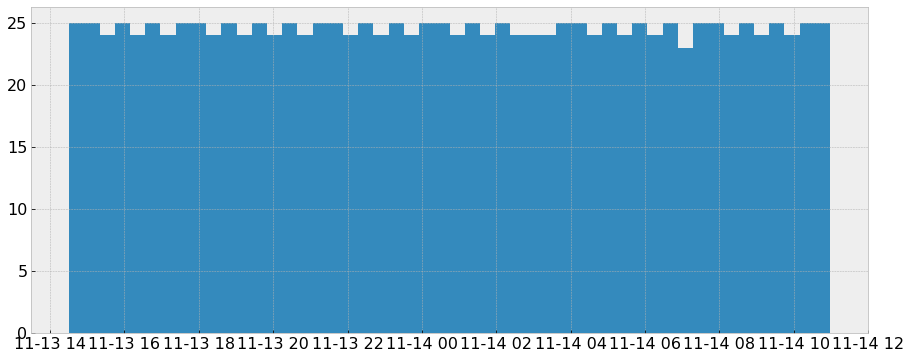

In [8]:
plt.hist(lista[:,0], bins = 50)

In [9]:
min(lista[:,2]), max(lista[:,2])

(29.5, 40.7)

Temp steigt mit 0.15°C pro Stunde


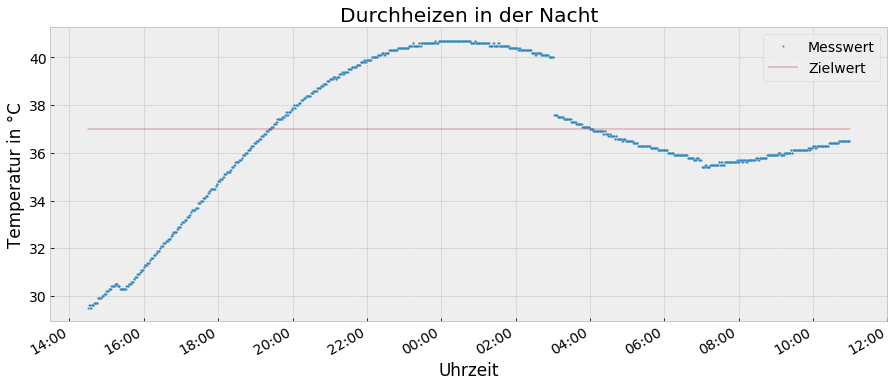

In [29]:
fig, ax = plt.subplots(1)


plt.plot(lista[:,0],lista[:,2], '.',ms=2, label = 'Messwert')


ausw = lista#[len(lista)//2:]
xx, x, y = mdates.date2num(ausw[:,0]), ausw[:,0,], np.array(ausw[:,2], dtype = float)
z = np.polyfit(xx, y, 1)
p = np.poly1d(z)

plt.plot(x, 37 +xx*0, label = 'Zielwert', alpha = .2)
#plt.plot(x,p(xx))
plt.gcf().autofmt_xdate() 
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt), plt.xlabel('Uhrzeit'), plt.ylabel('Temperatur in °C'), plt.title('Durchheizen in der Nacht'), plt.legend()
print("Temp steigt mit {:1.2f}°C pro Stunde".format(z[0]/(24)))
plt.savefig('Durchheizen.jpg', dpi=300)